<center>
    <h1> La Régression Logisitique</h1>
</center>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving clients.csv to clients.csv


In [43]:
# Importation des librairies
%matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Using matplotlib backend: agg


In [44]:
# Importer le dataset
dataset = pd.read_csv('clients.csv')


In [45]:
# Visualisation des données
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


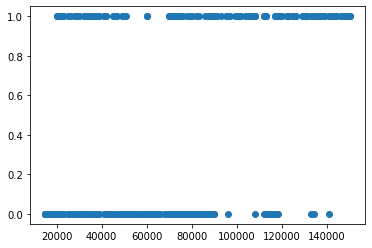

In [46]:
#Afficher le Dataset

plt.scatter(dataset.EstimatedSalary, dataset.Purchased) 
plt.show()


In [47]:
#Suppression de User ID
dataset.drop(['User ID'],axis='columns',inplace=True)


In [48]:
# Visualiser les données
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [49]:
# Transformer la variable Gender
dataset.Gender = dataset.Gender.map({'Male': 1, 'Female': 2})
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,2,26.0,43000.0,0
3,2,27.0,57000.0,0
4,1,19.0,76000.0,0


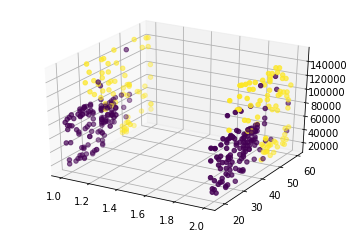

In [50]:
ax = plt.axes(projection='3d')
ax.scatter(dataset.Gender,dataset.Age,dataset.EstimatedSalary, c=dataset.Purchased)

In [51]:
# Pourcentage d'achat
count_sub = len(dataset[dataset['Purchased']==1])
count_no_sub = len(dataset[dataset['Purchased']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Pourcentage absence d'achat", pct_of_no_sub*100)

Pourcentage absence d'achat 64.25


Text(0, 0.5, 'Pourcentage de client')

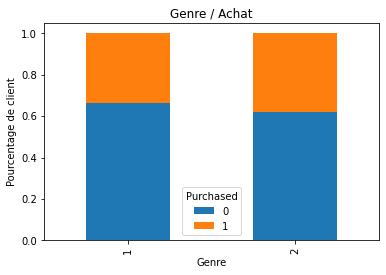

In [60]:
table= pd.crosstab(dataset.Gender,dataset.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Genre / Achat')
plt.xlabel('Genre')
plt.ylabel('Pourcentage de client')


In [61]:
dataset.drop(['Gender'],axis='columns',inplace=True)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


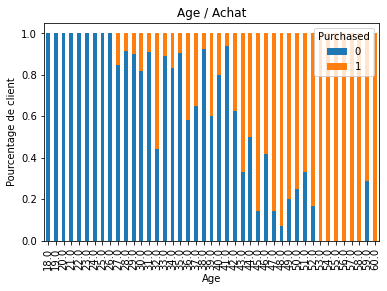

In [62]:
table= pd.crosstab(dataset.Age,dataset.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age / Achat')
plt.xlabel('Age')
plt.ylabel('Pourcentage de client')
plt.savefig('Age-Achat')

Text(0, 0.5, 'Pourcentage de client')

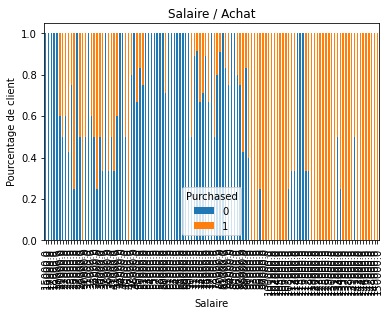

In [63]:
table= pd.crosstab(dataset.EstimatedSalary,dataset.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Salaire / Achat')
plt.xlabel('Salaire')
plt.ylabel('Pourcentage de client')

In [64]:
# Définir notre variable dépendante y et nos variables indépendantes X
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, -1].values

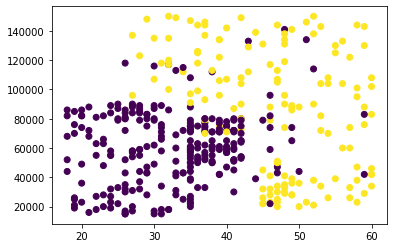

In [65]:
# Visualisation des points
plt.scatter(X[:,0],X[:,1], c=y)


In [67]:
# Diviser le dataset entre le Training set et le Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [68]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test


array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [69]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.89

In [71]:
# Matrice de confusion

cm = confusion_matrix(y_test, y_pred)
print(cm)

#print(classification_report(y_test, y_pred))

[[65  3]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


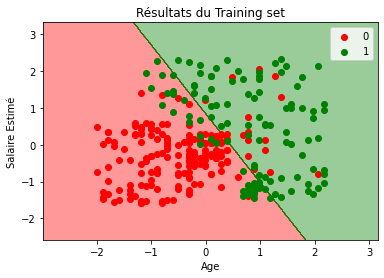

In [72]:
# Visualiser les résultats

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

In [73]:
x_predict = sc.transform([[35,15000]])
classifier.predict(x_predict)

array([0])